<a href="https://colab.research.google.com/github/Aicoaching2025/Feature-Engineering/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Inspect the data
print(titanic.head())
print(titanic.info())

# Handle missing values (example: fill missing age values with median)
titanic['age'].fillna(titanic['age'].median(), inplace=True)



   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

<ipython-input-2-3f0cac030c9a>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


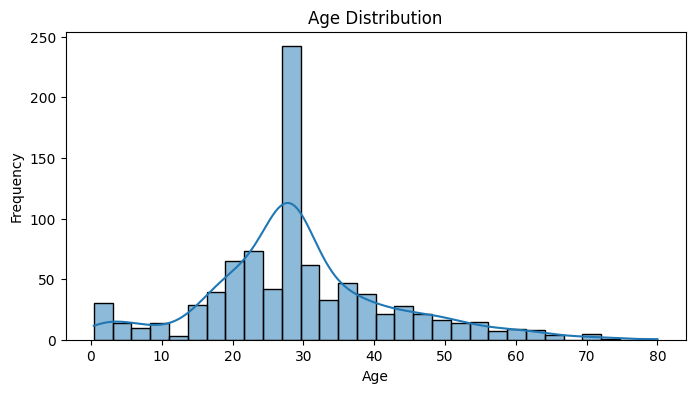

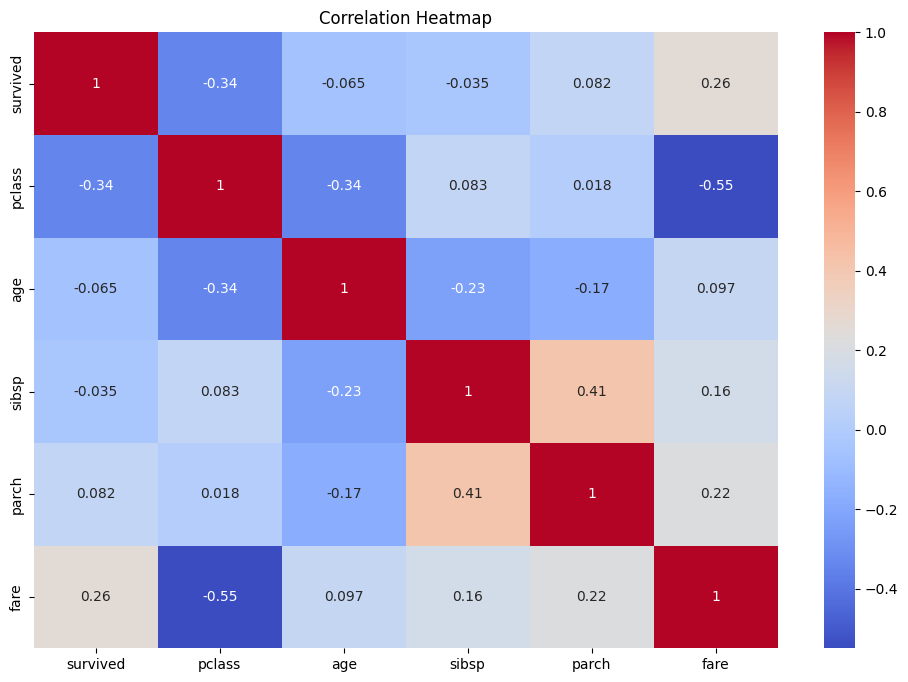

In [4]:
# Histogram of Age
plt.figure(figsize=(8, 4))
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_titanic = titanic.select_dtypes(include=np.number)
sns.heatmap(numeric_titanic.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


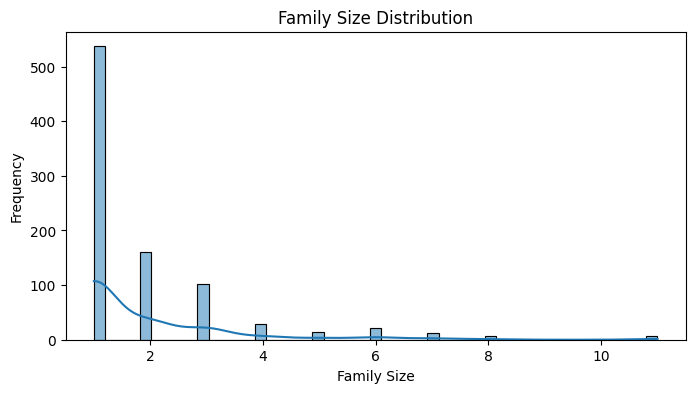

In [5]:
# Create a new feature: FamilySize
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch'] + 1

# Visualize the new feature
plt.figure(figsize=(8, 4))
sns.histplot(titanic['FamilySize'], kde=True)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

# Example of encoding: Convert 'sex' to numeric values
titanic['sex_encoded'] = titanic['sex'].map({'male': 0, 'female': 1})


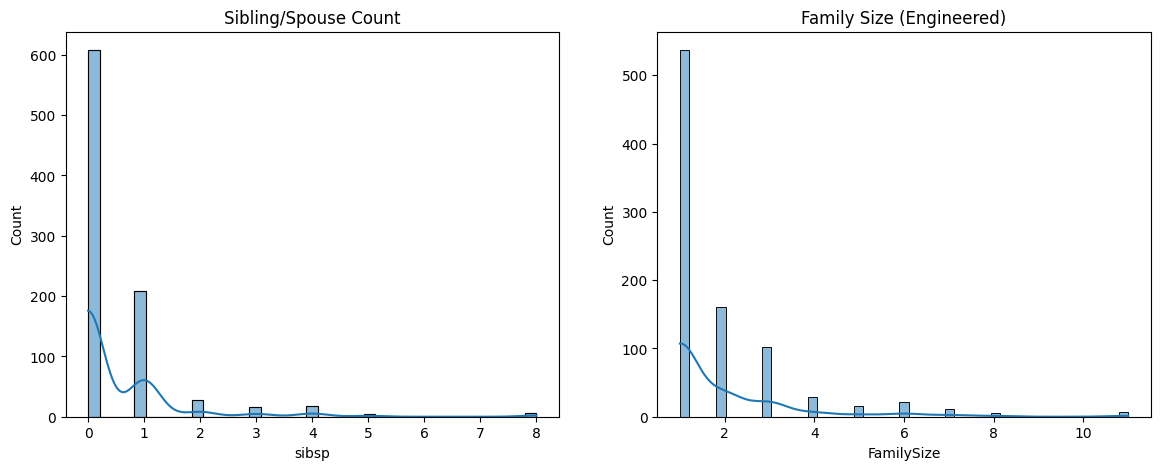

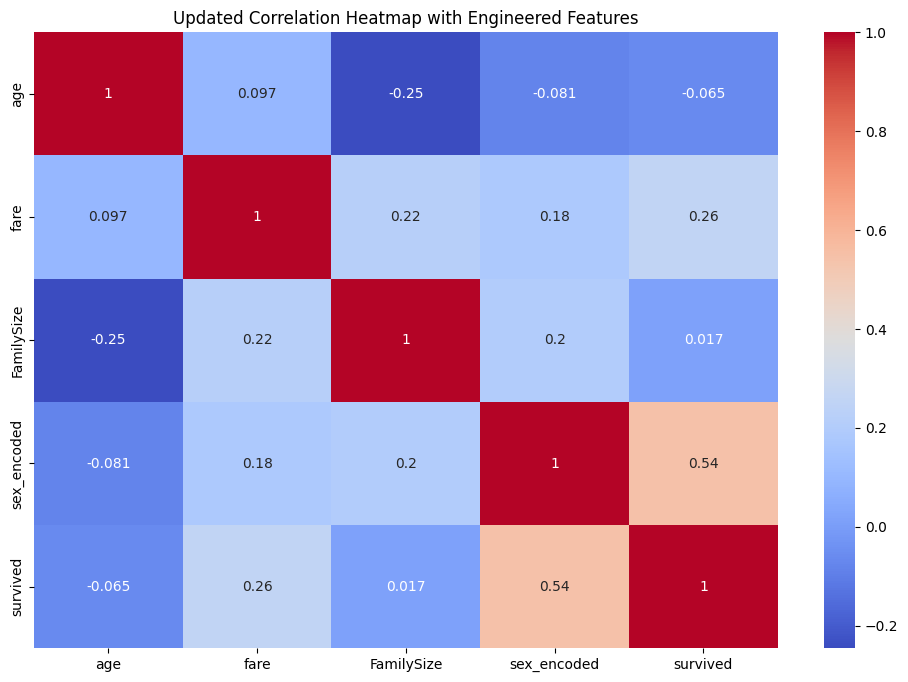

In [6]:
# Compare original 'sibsp' and new 'FamilySize'
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(titanic['sibsp'], kde=True, ax=ax[0])
ax[0].set_title('Sibling/Spouse Count')
sns.histplot(titanic['FamilySize'], kde=True, ax=ax[1])
ax[1].set_title('Family Size (Engineered)')
plt.show()

# Updated Correlation Heatmap including engineered features
plt.figure(figsize=(12, 8))
sns.heatmap(titanic[['age', 'fare', 'FamilySize', 'sex_encoded', 'survived']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Updated Correlation Heatmap with Engineered Features')
plt.show()
